In [243]:
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pgmpy as pgmpy
from pgmpy.models import NaiveBayes, BayesianModel
from pgmpy.inference import VariableElimination
from tabulate import tabulate as tab


In [244]:
df = pd.read_csv('Dataset/heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [245]:
df.shape
print("There are {} rows and {} columns".format(df.shape[0], df.shape[1]))

There are 299 rows and 13 columns


In [246]:
df.describe()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


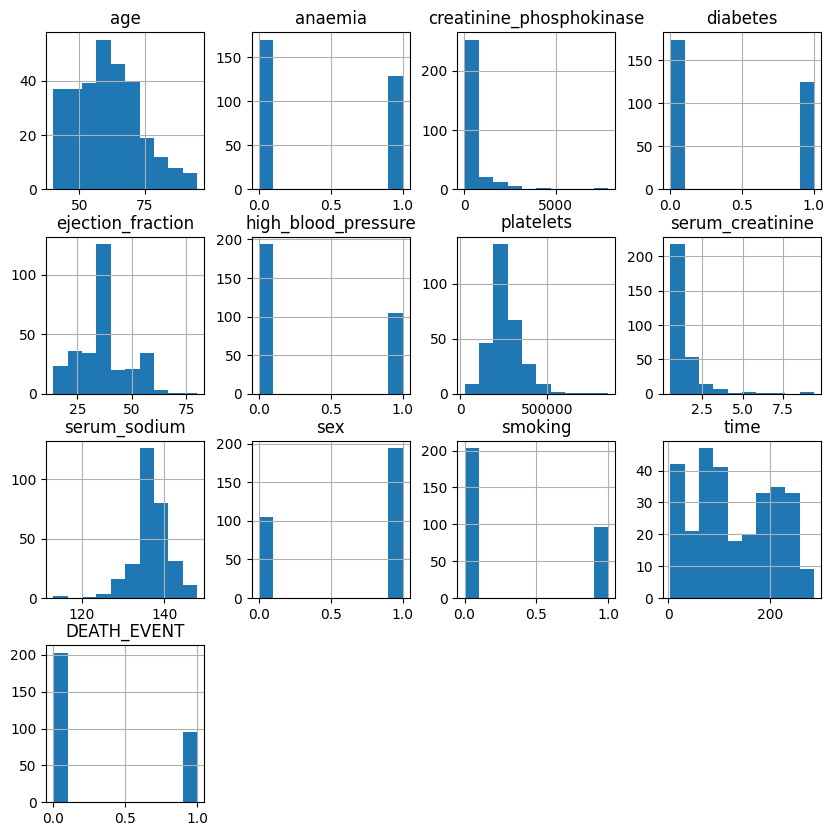

In [247]:
pd.DataFrame.hist(df,figsize = [10,10]);

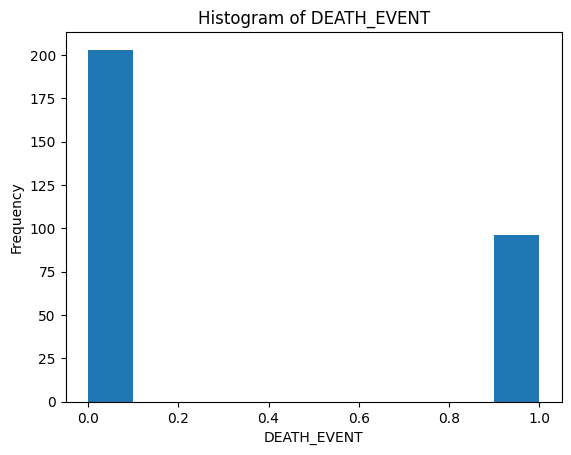

In [248]:
# Define the target variable
target = 'DEATH_EVENT'

# Plot histogram
plt.hist(df[target])
plt.title('Histogram of {}'.format(target))
plt.xlabel(target)
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [249]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [250]:
np.sum(pd.isnull(df), 0)



age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [251]:
data = {}
dic = { 
    'age':[40,50,60,75,95], 
    'creatinine_phosphokinase':[20,200,350,550,3000,8000], 
    'ejection_fraction': [0, 40, 50, 70, 100], 
    'platelets':[0, 160000, 370000, 850000],
    'serum_creatinine': [0.5, 1.0, 1.5, 3.5, 9.5],
    'serum_sodium': [110, 135, 145, 150],
    'time': [0, 70, 160, 300]
    }
for key, val in dic.items():
    bin = pd.cut(df[key], val)
    interval = {x: i for i, x in enumerate(bin.dtype.categories)}
    data[key] = interval
    df[key] = bin.apply(lambda x: interval[x])
#data
#target='age'
#plt.hist(df[target])
#df

for col, map in data.items():
    print(col)
    table = tab(map.items(), headers=['Interval', 'Value'], tablefmt='fancy_grid')
    print(table, end='\n\n')


    

age
╒════════════╤═════════╕
│ Interval   │   Value │
╞════════════╪═════════╡
│ (40, 50]   │       0 │
├────────────┼─────────┤
│ (50, 60]   │       1 │
├────────────┼─────────┤
│ (60, 75]   │       2 │
├────────────┼─────────┤
│ (75, 95]   │       3 │
╘════════════╧═════════╛

creatinine_phosphokinase
╒══════════════╤═════════╕
│ Interval     │   Value │
╞══════════════╪═════════╡
│ (20, 200]    │       0 │
├──────────────┼─────────┤
│ (200, 350]   │       1 │
├──────────────┼─────────┤
│ (350, 550]   │       2 │
├──────────────┼─────────┤
│ (550, 3000]  │       3 │
├──────────────┼─────────┤
│ (3000, 8000] │       4 │
╘══════════════╧═════════╛

ejection_fraction
╒════════════╤═════════╕
│ Interval   │   Value │
╞════════════╪═════════╡
│ (0, 40]    │       0 │
├────────────┼─────────┤
│ (40, 50]   │       1 │
├────────────┼─────────┤
│ (50, 70]   │       2 │
├────────────┼─────────┤
│ (70, 100]  │       3 │
╘════════════╧═════════╛

platelets
╒══════════════════╤═════════╕
│ Interv